# Forbes Billionaires of 2021 Dataset

## Names: Nivedita Thapa, Shruti Garg, Ruchira Teli, Celine Tsai

#### Following is the brief descrption about this dataset

This Dataset contains list of all the people categorized as Billionaires of 2021 by Forbes in their 35th Annual World's Billionaires List. 
Here is a quick decrption about the columns of the dataset.

Name = Name of the each Billionaire

Networth = Their net worth in billions (USD $)

Country = Country in which they reside currently

Source = Source of their Income namely the Company Name/Industry Name 

Rank = Global Positions in comparison with their Net Worth

Age = Age of all the billionaires in the list in years 

Residence = Name of cities/country in which they reside currently

Citizenship = Citizenship status of the billionaries

Status = Represents their relationship status 

Children = Number of children they have currently

Education = Eduction after their elementary school

Self_Made = Whether their wealth is built by them individually or is been inherited from their family

Lets explore the data and find out the treasure of insights that are present in it, which can inspire or propell us into this list in the future !!!

# 1. Data Cleaning

In [ ]:
#Import the required libraries 
import pandas as pd 
import numpy as np
from IPython.display import *
import seaborn as sns
import scipy as stats
import matplotlib as mpl
from matplotlib.pylab import plt
import importlib 
import plotly.express as px

pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Python Group/forbes_billionaires.csv')

In [ ]:
df.head()

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made
0,Jeff Bezos,177.00,United States,Amazon,1,57.00,"Seattle, Washington",United States,In Relationship,4.00,"Bachelor of Arts/Science, Princeton University",True
1,Elon Musk,151.00,United States,"Tesla, SpaceX",2,49.00,"Austin, Texas",United States,In Relationship,7.00,"Bachelor of Arts/Science, University of Pennsy...",True
2,Bernard Arnault & family,150.00,France,LVMH,3,72.00,"Paris, France",France,Married,5.00,"Bachelor of Arts/Science, Ecole Polytechnique ...",False
3,Bill Gates,124.00,United States,Microsoft,4,65.00,"Medina, Washington",United States,Divorced,3.00,"Drop Out, Harvard University",True
4,Mark Zuckerberg,97.00,United States,Facebook,5,36.00,"Palo Alto, California",United States,Married,2.00,"Drop Out, Harvard University",True


In [ ]:
#Uppercase everything
df.Name = df.Name.str.upper()
df.Country = df.Country.str.upper()
df.Source = df.Source.str.upper()
df.Residence = df.Residence.str.upper()
df.Citizenship = df.Citizenship.str.upper()
df.Status = df.Status.str.upper()
df.Education = df.Education.str.upper()
df.columns = df.columns.str.upper()

In [ ]:
#Seperating city from state/country
df[['RESIDENCE', 'STATE']] = df.RESIDENCE.str.split(',',n=1,expand=True)

In [ ]:
#Seperating education for those applicable
df[['UNIVERSITY_1', 'UNIVERSITY_2']] = df.EDUCATION.str.split('[;]',n=1,expand=True)

In [ ]:
#Seperating degree from school/university
df[['DEGREE_1', 'UNIVERSITY_1']] = df.UNIVERSITY_1.str.split('[,]',n=1,expand=True)
df[['DEGREE_2', 'UNIVERSITY_2']] = df.UNIVERSITY_2.str.split('[,]',n=1,expand=True)

In [ ]:
#Fill the missing values with np.nan
df.DEGREE_1 = df.DEGREE_1.fillna(np.nan)
df.DEGREE_2 = df.DEGREE_2.fillna(np.nan)

In [ ]:
#Cleaning discrepancies in SOURCE column
df['SOURCE'] = df['SOURCE'].replace(['★'],np.nan)
df.loc[234,'SOURCE']

nan

In [ ]:
#Cleaning discrepancies in STATUS column
df['STATUS'] = df['STATUS'].str.replace('WIDOWED,','')

In [ ]:
#Split words if mutiple words and take first word
df['DEGREE_1'] = df.DEGREE_1.str.split('OF',n=1,expand=True)
df['DEGREE_2'] = df.DEGREE_2.str.split('OF',n=1,expand=True)
df['DEGREE_1'] = df.DEGREE_1.str.split('IN',n=1,expand=True)
df['DEGREE_2'] = df.DEGREE_2.str.split('IN',n=1,expand=True)

In [ ]:
#Strip extra spaces
df.DEGREE_1 = df.DEGREE_1.str.strip()
df.DEGREE_2 = df.DEGREE_2.str.strip()

In [ ]:
#Cleaning DEGREE_1 AND DEGREE_2 
df.DEGREE_1 = df.DEGREE_1.str.replace('PH.D', 'DOCTORATE')
df.DEGREE_2 = df.DEGREE_2.str.replace('PH.D', 'DOCTORATE')
df.DEGREE_1 = df.DEGREE_1.str.replace('MASTERS', 'MASTER')
df.DEGREE_2 = df.DEGREE_2.str.replace('MASTERS', 'MASTER')
df.DEGREE_1 = df.DEGREE_1.str.replace('LLB', 'BACHELOR')
df.DEGREE_2 = df.DEGREE_2.str.replace('LLB', 'BACHELOR')
df.DEGREE_1 = df.DEGREE_1.str.replace('EMBA', 'MASTER')
df.DEGREE_2 = df.DEGREE_2.str.replace('EMBA', 'MASTER')
df.DEGREE_1 = df.DEGREE_1.str.replace('MEDICAL DOCTOR', 'MD')
df.DEGREE_2 = df.DEGREE_2.str.replace('MEDICAL DOCTOR', 'MD')
df.DEGREE_1 = df.DEGREE_1.str.replace('LLM', 'MASTER')
df.DEGREE_2 = df.DEGREE_2.str.replace('LLM', 'MASTER')
df.DEGREE_1 = df.DEGREE_1.str.replace('LAW DEGREE', 'JD')
df.DEGREE_2 = df.DEGREE_2.str.replace('LAW DEGREE', 'JD')
df.DEGREE_1 = df.DEGREE_1.str.replace('HIGH SCHOOL', 'HIGH SCHOOL GRADUATE')
df.DEGREE_2 = df.DEGREE_2.str.replace('HIGH SCHOOL', 'HIGH SCHOOL GRADUATE')
df.DEGREE_1 = df.DEGREE_1.str.replace('HIGH SCHOOL GRADUATE GRADUATE', 'HS DIPLOMA')
df.DEGREE_2 = df.DEGREE_2.str.replace('HIGH SCHOOL GRADUATE GRADUATE', 'HS DIPLOMA')
df.DEGREE_1 = df.DEGREE_1.str.replace('HIGH SCHOOL GRADUATE', 'HS DIPLOMA')
df.DEGREE_2 = df.DEGREE_2.str.replace('HIGH SCHOOL GRADUATE', 'HS DIPLOMA')

In [ ]:
df.DEGREE_1 = df.DEGREE_1.str.replace('BACHELOR', 'BACHELOR\'S')
df.DEGREE_2 = df.DEGREE_2.str.replace('BACHELOR', 'BACHELOR\'S')
df.DEGREE_1 = df.DEGREE_1.str.replace('MASTER', 'MASTER\'S')
df.DEGREE_2 = df.DEGREE_2.str.replace('MASTER', 'MASTER\'S')
df.DEGREE_1 = df.DEGREE_1.str.replace('ASSOCIATE', 'ASSOCIATE\'S')
df.DEGREE_2 = df.DEGREE_2.str.replace('ASSOCIATE', 'ASSOCIATE\'S')

In [ ]:
#Replace values not in list with np.nan
allowed_vals = ["BACHELOR'S", 'DROP OUT', "MASTER'S", "DOCTORATE", "ASSOCIATE", "ASSOCIATE'S", 'MD', 'JD', 'HS DIPLOMA', 'CERTIFICATE']
df.loc[~df.DEGREE_1.isin(allowed_vals), "DEGREE_1"] = np.nan
df.loc[~df.DEGREE_2.isin(allowed_vals), "DEGREE_2"] = np.nan

In [ ]:
#Create new dataframe with desired columns, filled NoneType values
df_clean = df[['RANK','NAME', 'NETWORTH', 'SOURCE', 'AGE', 'COUNTRY', 'RESIDENCE', 'CITIZENSHIP', 'STATUS', 'CHILDREN', 'UNIVERSITY_1', 
               'DEGREE_1', 'UNIVERSITY_2', 'DEGREE_2', 'SELF_MADE']]

In [ ]:
df_clean.head(5)

,RANK,NAME,NETWORTH,SOURCE,AGE,COUNTRY,RESIDENCE,CITIZENSHIP,STATUS,CHILDREN,UNIVERSITY_1,DEGREE_1,UNIVERSITY_2,DEGREE_2,SELF_MADE
0,1,JEFF BEZOS,177.00,AMAZON,57.00,UNITED STATES,SEATTLE,UNITED STATES,IN RELATIONSHIP,4.00,PRINCETON UNIVERSITY,BACHELOR'S,None,NaN,True
1,2,ELON MUSK,151.00,"TESLA, SPACEX",49.00,UNITED STATES,AUSTIN,UNITED STATES,IN RELATIONSHIP,7.00,UNIVERSITY OF PENNSYLVANIA,BACHELOR'S,None,NaN,True
2,3,BERNARD ARNAULT & FAMILY,150.00,LVMH,72.00,FRANCE,PARIS,FRANCE,MARRIED,5.00,ECOLE POLYTECHNIQUE DE PARIS,BACHELOR'S,None,NaN,False
3,4,BILL GATES,124.00,MICROSOFT,65.00,UNITED STATES,MEDINA,UNITED STATES,DIVORCED,3.00,HARVARD UNIVERSITY,DROP OUT,None,NaN,True
4,5,MARK ZUCKERBERG,97.00,FACEBOOK,36.00,UNITED STATES,PALO ALTO,UNITED STATES,MARRIED,2.00,HARVARD UNIVERSITY,DROP OUT,None,NaN,True


In [ ]:
df.dtypes

NAME             object
NETWORTH        float64
COUNTRY          object
SOURCE           object
RANK              int64
AGE             float64
RESIDENCE        object
CITIZENSHIP      object
STATUS           object
CHILDREN        float64
EDUCATION        object
SELF_MADE        object
STATE            object
UNIVERSITY_1     object
UNIVERSITY_2     object
DEGREE_1         object
DEGREE_2         object
dtype: object

## Data Manipulation & Visualization

### 1. List the top 20 countries having maximum number of billionaries and find the total number of people in 2021 billionaires list?

In [ ]:
# Print the list of country names and total number of billionaries
countries = df_clean['COUNTRY'].value_counts()
print(countries.head(20))
# Print total number of billionaries
sum = df_clean['COUNTRY'].value_counts().sum()
print ('\nThere are '+ str(sum) +' people in 2021 billionaries list')

UNITED STATES     724
CHINA             626
INDIA             140
GERMANY           136
RUSSIA            118
HONG KONG          71
BRAZIL             65
CANADA             64
UNITED KINGDOM     56
ITALY              51
JAPAN              49
TAIWAN             47
AUSTRALIA          44
SOUTH KOREA        43
FRANCE             42
SWEDEN             41
SWITZERLAND        40
THAILAND           31
SPAIN              30
TURKEY             27
Name: COUNTRY, dtype: int64

There are 2755 people in 2021 billionaries list


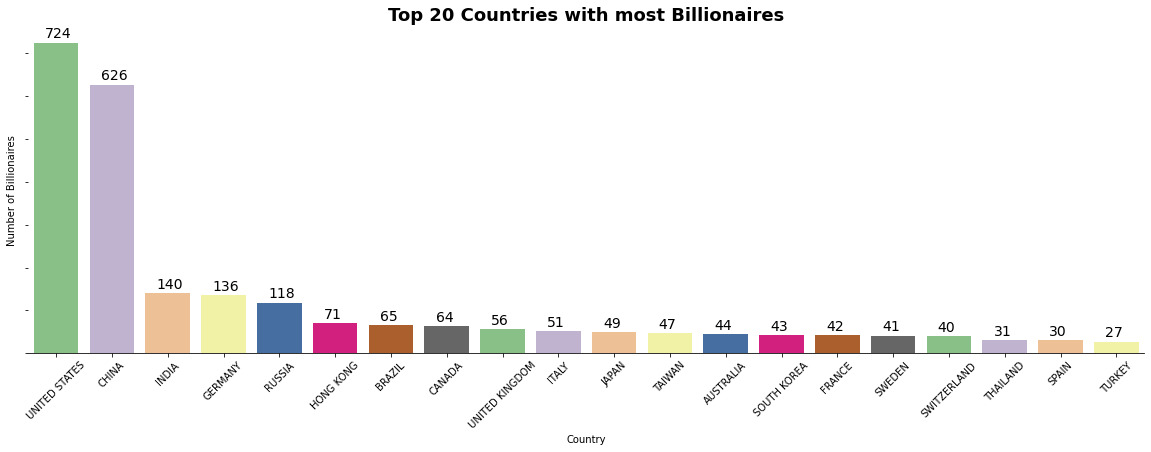

In [ ]:
#Billionaries by each country (bar chart)

#Data prepping
countries = df_clean.groupby('COUNTRY', dropna=True).size().sort_values(ascending=False)
countries_df = pd.DataFrame(countries)
countries_df['Country'] = countries_df.index
countries_df.columns = ['Number of Billionaires', 'Country']
countries_df = countries_df.iloc[0:20, :]

#Create a barchart
from matplotlib import rcParams
fig, ax = plt.subplots(1,1, figsize=(20, 6))
sns.barplot(x='Country', y='Number of Billionaires', data=countries_df, ax=ax, palette='Accent')

sns.despine(top=True, right=True, left=True)
ax.set_yticklabels([])
plt.title('Top 20 Countries with most Billionaires', fontsize= 18,fontweight='bold')
ax.set_xticklabels(countries_df['Country'], rotation=45,fontsize= 10)                      

for i in range(len(ax.get_xticklabels())):
    x = ax.get_xticklabels()[i].get_text()
    val = countries_df['Number of Billionaires'][countries_df.Country==x].tolist()[0]
    plt.text(i-0.2, val+10, str(val), fontsize= 14, rotation=0)

Conclusion : 

United States is by far having the most number of Billionaires and China is equally challenging US by adding more number of Billionaires to its list and having a  close gap with United States. Both these countries are creating wealth at an enormous scale followed by a develpoing country like India.

### 2.List the top 10 Billionaires based on their Networth and show their Source of Income and Residence details.

In [ ]:
Blist1 = df_clean[['RANK','NAME','NETWORTH','SOURCE','COUNTRY','RESIDENCE']].sort_values('NETWORTH', ascending = False).head(10)
Blist1.reset_index(drop = True)                         # Reset the Index 
Blist1.index = Blist1.RANK                              # Replace the index with the first column i.e RANK
Blist1.drop(columns = 'RANK',inplace = True)            # Drop the RANK column from the table
Blist1

,NAME,NETWORTH,SOURCE,COUNTRY,RESIDENCE
RANK,,,,,
1,JEFF BEZOS,177.00,AMAZON,UNITED STATES,SEATTLE
2,ELON MUSK,151.00,"TESLA, SPACEX",UNITED STATES,AUSTIN
3,BERNARD ARNAULT & FAMILY,150.00,LVMH,FRANCE,PARIS
4,BILL GATES,124.00,MICROSOFT,UNITED STATES,MEDINA
5,MARK ZUCKERBERG,97.00,FACEBOOK,UNITED STATES,PALO ALTO
6,WARREN BUFFETT,96.00,BERKSHIRE HATHAWAY,UNITED STATES,OMAHA
7,LARRY ELLISON,93.00,SOFTWARE,UNITED STATES,LANAI
8,LARRY PAGE,91.50,GOOGLE,UNITED STATES,PALO ALTO
9,SERGEY BRIN,89.00,GOOGLE,UNITED STATES,LOS ALTOS


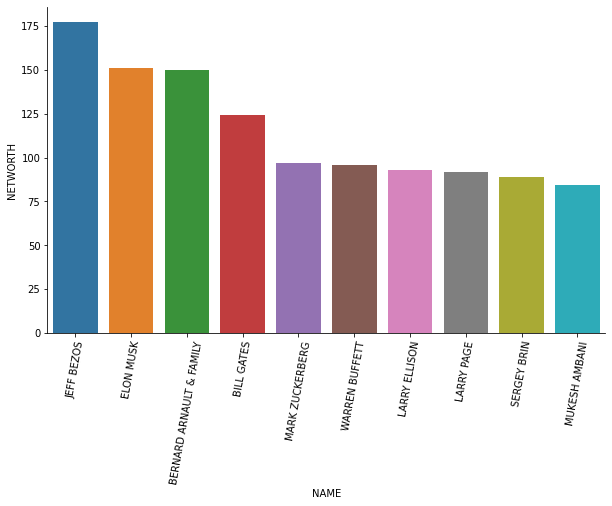

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=Blist1, x='NAME', y ='NETWORTH')
plt.xticks(rotation= 80)
sns.despine()
plt.show()                                                                

Conclusion:
    
Jeff Bezos is still the undisputed champion holding the title of "The wealthiest person in the world." with the Networth of 177 Billion dollars. 

Followed by Elon Musk who is giving a very close competition by at second place with the Networth of 151 Billion dollars.

### 3. What is the count of Billionaries based on their Relationship Status and if they are Self Made?

In [ ]:
pd.pivot_table(df_clean,index = 'SELF_MADE',columns = 'STATUS',values = 'NAME',aggfunc = len ,margins = True,margins_name = 'GRAND_TOTAL')

STATUS,REMARRIED,DIVORCED,ENGAGED,IN RELATIONSHIP,MARRIED,SEPARATED,SINGLE,WIDOWED,GRAND_TOTAL
SELF_MADE,,,,,,,,,
False,3.00,61.00,nan,3.00,467.00,5.00,19.00,64.00,622
True,5.00,83.00,4.00,18.00,"1,267.00",5.00,55.00,31.00,1468
GRAND_TOTAL,8.00,144.00,4.00,21.00,"1,734.00",10.00,74.00,95.00,2090


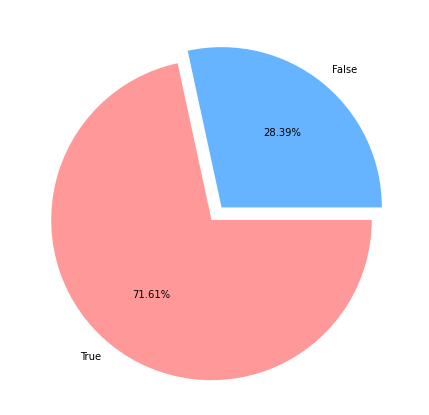

In [ ]:
# What percent of Billionaries are self - made and not self - made ? 
fig, ax = plt.subplots(figsize = (6,6))
explode = (0, 0.1)
colors = ['#66b3ff', '#ff9999']
df_clean.groupby(['SELF_MADE']).size().plot.pie(explode = explode, autopct='%.2f%%', colors = colors)
ax.set_ylabel(" ")
plt.tight_layout()

Conclusion : We can see that there are more self-made billionaires than the ones who are not self-made. So this means that if you put your best effort into your passion, you could also become one of them.

### 4. Analysis of the billionaries based on their Age and Networth

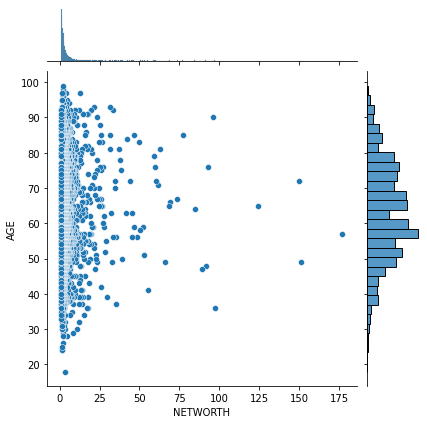

In [ ]:
sns.jointplot(y='AGE',x='NETWORTH',data=df_clean)

Conclusion : Maximum Networth is in the range of $0-25 Billion and maximum age of Billionaire is between 50-80 years.

### 5. Analysis of the relationship between Net Worth and Relationship Status

In [ ]:
status = df_clean.groupby("STATUS", as_index=False)["NETWORTH"].mean()

status["NETWORTH"] = status["NETWORTH"].round(decimals=2)

status.sort_values(by="NETWORTH", axis=0, ascending=False, kind='quicksort', inplace=True)

fig = px.bar(status, x="STATUS", y="NETWORTH", color="STATUS", text="NETWORTH",
             color_discrete_sequence=px.colors.qualitative.Prism)

fig.update_layout(title_text=" Average Net Worth in ($Bn) per Relationship Status", title_y= 0.97, title_x= 0.55, title_font_size=18,
                   height= 400, width= 600, yaxis_title="Net Worth ", xaxis_title="Relationship Status")

Conclusion: The results above show that billionaires that are in a relationship have the highest average net worth. Moreover, it is interesting to see that the average net worth of billionaires who are with someone (whether they are in a relationship, engaged, married or remarried) is higher than those who are not with someone.

### 6. Top 15 cities with most number of Billionaires 

In [ ]:
#Preparing the data
cities = df_clean.groupby('RESIDENCE', as_index=False)['NAME'].count()
cities.sort_values('NAME', ascending=False, inplace=True)
cities.reset_index(drop=True, inplace=True)
cities.rename(columns={'NAME':'Billionaires'}, inplace=True)
cities = cities.iloc[0:15, :]

fig = px.bar(cities, x= 'Billionaires', y='RESIDENCE', color= 'RESIDENCE', text="Billionaires",
             color_discrete_sequence=px.colors.qualitative.Alphabet)

fig.update_layout(title_text="Top 15 Cities with most Billionaires", title_y=0.97, title_x=0.45, title_font_size=22,
                  height=400, width=600, yaxis_title="City", xaxis_title="Number of Billionaires")

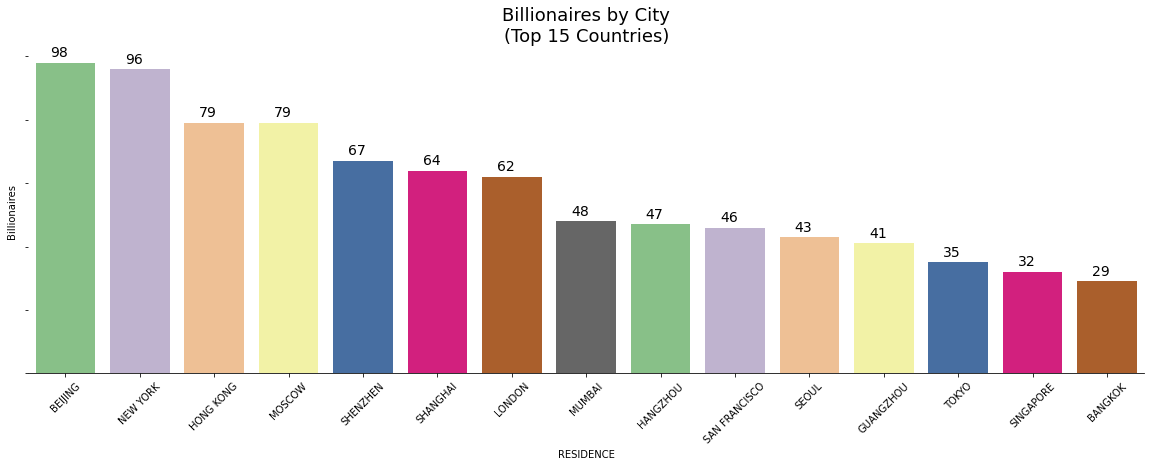

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20, 6))
sns.barplot(x='RESIDENCE', y='Billionaires', data=cities, ax=ax, palette='Accent')

sns.despine(left=True)
ax.set_yticklabels([])
plt.title('Billionaires by City\n(Top 15 Countries)', fontsize=18)
ax.set_xticklabels(cities['RESIDENCE'], rotation=45)

for i in range(len(ax.get_xticklabels())):
    x = ax.get_xticklabels()[i].get_text()
    val = cities['Billionaires'][cities.RESIDENCE==x].tolist()[0]
    plt.text(i-0.2, val+2, str(val), fontsize=14, rotation=0)

Conclusion: Considering the observations of the previous analysis and graphs. Since China and the US had the highest number of billionaires, it can be expected that the cities of the these countries also have the highest number of billionaires. Suprisingly, out of the top 15 cities with the most billionaires, China has 6 cities whereas the US has only 2. This shows that billionaires are spread out more across the country in China as opposed to the US.

### 7. How many Billionaries have a different country of residence as compared to their citizenship?

In [ ]:
Diff = (df_clean['COUNTRY'].value_counts()) - (df_clean['CITIZENSHIP'].value_counts())
display(Diff[Diff != 0])  # Display only countries whose difference is not zero
Total = Diff[Diff != 0].sum()
print('There are total '+str(Total)+ ' billionaries having different country of residence as compared to their citizenship.')

UNITED STATES     6
CHINA             4
INDIA             2
HONG KONG         1
CANADA            1
UNITED KINGDOM    1
SPAIN             1
dtype: int64

There are total 16 billionaries having different country of residence as compared to their citizenship.


Conclusion : There are 6 billionaries in US who are immigrants not currently having US Citizenship and have still made their fortune. We can find good number of  immigrants making it to the worlds richest peoples list from countries such as China,India. There is one billionarie each from Hong Kong,Canada,UK & Spain.

### 8.Name the Billionaries which has Walmart as the source of income ?

In [ ]:
Blist2 = df_clean[df_clean.SOURCE == 'WALMART' ]
Blist2.reset_index(drop = True,inplace = True)
display(Blist2[['NAME','NETWORTH']])

,NAME,NETWORTH
0,ALICE WALTON,61.80
1,JIM WALTON,60.20
2,ROB WALTON,59.50
3,LUKAS WALTON,15.60
4,ANN WALTON KROENKE,8.40
5,NANCY WALTON LAURIE,7.50
6,CHRISTY WALTON,7.20


Conclusion : There are around 7 Walton members of the family who have entered in the billionaries list as individual billionaries and not as a family.

### 9. How many Billionaries have diversified source of income ?

In [ ]:
source = df_clean.SOURCE.isin(['DIVERSIFIED']).value_counts()    
print('There are ' +str(source[1])+ ' number of Billionaries having diversified source of income.' )

There are 87 number of Billionaries having diversified source of income.


Conclusion : Multiple streams of revenue has helped around 87 billionaries to fall under the list of worlds richest people.

### 10. List the number of Billionaries falling under each age category?

In [ ]:
# Age Group Categorization
df_Age = df_clean.dropna(subset=['AGE'])    
def Age(age):
    if age >= 90 : return '90 years old'
    if age >= 80 : return '80 years old'
    if age >= 70 : return '70 years old'
    if age >= 60 : return '60 years old'
    if age >= 50 : return '50 years old'
    if age >= 40 : return '40 years old'
    if age >= 30 : return '30 years old'
    if age >= 20 : return '20 years old'
    else: return 'Teenager'
df_Age['AGE_GROUP'] = df_Age.apply(lambda x: Age(x['AGE']), axis = 1)
df_Age.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,RANK,NAME,NETWORTH,SOURCE,AGE,COUNTRY,RESIDENCE,CITIZENSHIP,STATUS,CHILDREN,UNIVERSITY_1,DEGREE_1,UNIVERSITY_2,DEGREE_2,SELF_MADE,AGE_GROUP
0,1,JEFF BEZOS,177.00,AMAZON,57.00,UNITED STATES,SEATTLE,UNITED STATES,IN RELATIONSHIP,4.00,PRINCETON UNIVERSITY,BACHELOR'S,None,NaN,True,50 years old
1,2,ELON MUSK,151.00,"TESLA, SPACEX",49.00,UNITED STATES,AUSTIN,UNITED STATES,IN RELATIONSHIP,7.00,UNIVERSITY OF PENNSYLVANIA,BACHELOR'S,None,NaN,True,40 years old
2,3,BERNARD ARNAULT & FAMILY,150.00,LVMH,72.00,FRANCE,PARIS,FRANCE,MARRIED,5.00,ECOLE POLYTECHNIQUE DE PARIS,BACHELOR'S,None,NaN,False,70 years old
3,4,BILL GATES,124.00,MICROSOFT,65.00,UNITED STATES,MEDINA,UNITED STATES,DIVORCED,3.00,HARVARD UNIVERSITY,DROP OUT,None,NaN,True,60 years old
4,5,MARK ZUCKERBERG,97.00,FACEBOOK,36.00,UNITED STATES,PALO ALTO,UNITED STATES,MARRIED,2.00,HARVARD UNIVERSITY,DROP OUT,None,NaN,True,30 years old


[]

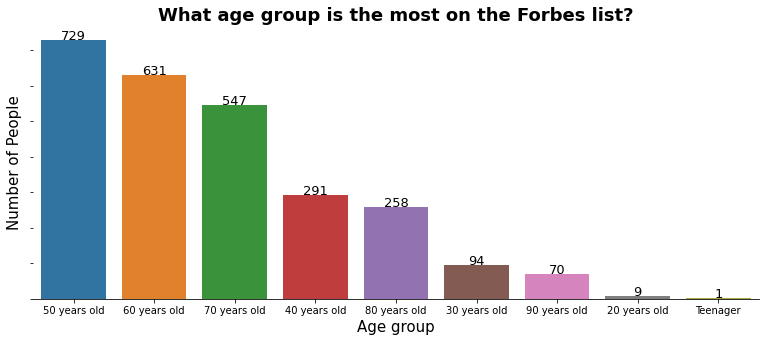

In [ ]:
plt.figure(figsize=(13,5))
age_categ_count = df_Age['AGE_GROUP'].value_counts()
ax = sns.countplot(x='AGE_GROUP', 
                   data = df_Age,
                   order = age_categ_count.index,
                   linewidth=2)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 13)
ax.set_title('What age group is the most on the Forbes list?',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Age group', fontsize = 15)
ax.set_ylabel('Number of People', fontsize = 15)
sns.despine(left = True)
ax.set_yticklabels([])

Conclusion : As we can see, the billionaries are mostly present in the age group of 50 to 60 years. Which focuses on the experience factor i.e. as as you grow old, you can make less number of mistakes from your experiences which you had in the past and make right choices in the money matters.

Conclusion : Self-Made billionaries are the highest in the age group of 50-60 years and billionaiers who are not self-made are highest in the age group of 60-70 years. (No matter which age group you fall under but if you are self-made you can strive to be in the list of worlds richest people.)

### 11. Find the top 5 countries where Families are in the billionaries list?

In [ ]:
Family_count = df_clean[df_clean['NAME'].str.contains('FAMILY')]
Family_count = Family_count[['COUNTRY']].value_counts()
Family_count = Family_count.reset_index(name='FAMILY_COUNT')
Family_count.head(5)

,COUNTRY,FAMILY_COUNT
0,CHINA,160
1,UNITED STATES,41
2,GERMANY,17
3,INDIA,13
4,FRANCE,11


Conclusion : There are a few richest families owning the deeper legacy and even deeper pockets. Household names holding up in the mordern rankings are found the highest in China with about 160 families.Followed by US,Germany,India,France etc. The richest family in the world is from US the waltons family founder of walmart with a networth of 247 billion. In China the Qin Yinglin & family is the richest family with 33.5 Billion networth.

### 12. What is the most common relationship status among billionaires?

In [ ]:
status_count = df_clean.STATUS.value_counts()
display(status_count)

MARRIED            1734
DIVORCED            144
WIDOWED              95
SINGLE               74
IN RELATIONSHIP      21
SEPARATED            10
 REMARRIED            8
ENGAGED               4
Name: STATUS, dtype: int64

[]

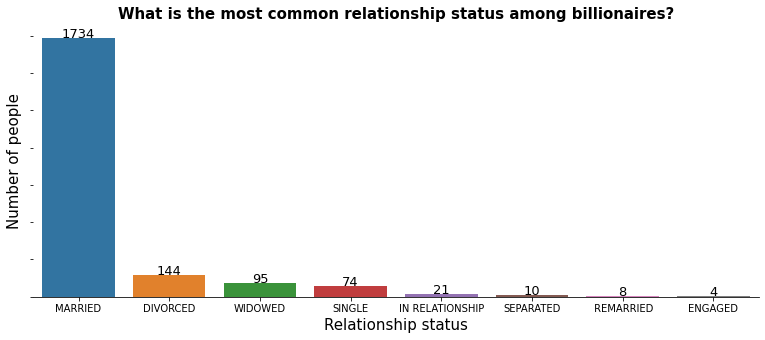

In [ ]:
#What is the most common marital status among billionaires? Are there more married or single?

plt.figure(figsize=(13,5))
mar_stat_count = df_clean['STATUS'].value_counts()
ax = sns.countplot(x="STATUS", 
                   data = df_clean,
                   order = mar_stat_count.index,
                   linewidth=2)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 13)
ax.set_title('What is the most common relationship status among billionaires?',fontsize = 15, fontweight='bold' )
ax.set_xlabel('Relationship status', fontsize = 15)
ax.set_ylabel('Number of people', fontsize = 15)
sns.despine(left = True)
ax.set_yticklabels([])


Ans: Love triumphs even among billionaires as there is a large majority of married billionaires, unfortunately followed by many divorced.

### 13.Analysis of the most common sources of income - Remove

In [ ]:
#Preparring the datab
income = df_clean.groupby("SOURCE", as_index=False)["NAME"].count()
income.sort_values(by="NAME", ascending=False, axis=0, kind='quicksort', inplace=True)
income.reset_index(drop=True, inplace=True)
income = income.iloc[0:10, :]

#top_income = income.head(10)

fig = px.bar(top_income, y="SOURCE", x="NAME", text="NAME", color="SOURCE",
            color_discrete_sequence=px.colors.qualitative.T10)

fig.update_layout(title_text="Top Sources of Income for Billionaires", title_y=0.97, title_x=0.5, title_font_size=22,
                   height=400, width= 600, xaxis_title="Number of Billionaires", yaxis_title="Source")

NameError: ignored

In [ ]:
income

,SOURCE,NAME
0,REAL ESTATE,176
1,PHARMACEUTICALS,101
2,INVESTMENTS,93
3,DIVERSIFIED,87
4,SOFTWARE,64
5,RETAIL,47
6,HEDGE FUNDS,42
7,PRIVATE EQUITY,35
8,CHEMICALS,33
9,CONSUMER GOODS,32


In [ ]:
income.value_counts()

SOURCE           NAME
SOFTWARE         64      1
RETAIL           47      1
REAL ESTATE      176     1
PRIVATE EQUITY   35      1
PHARMACEUTICALS  101     1
INVESTMENTS      93      1
HEDGE FUNDS      42      1
DIVERSIFIED      87      1
CONSUMER GOODS   32      1
CHEMICALS        33      1
dtype: int64

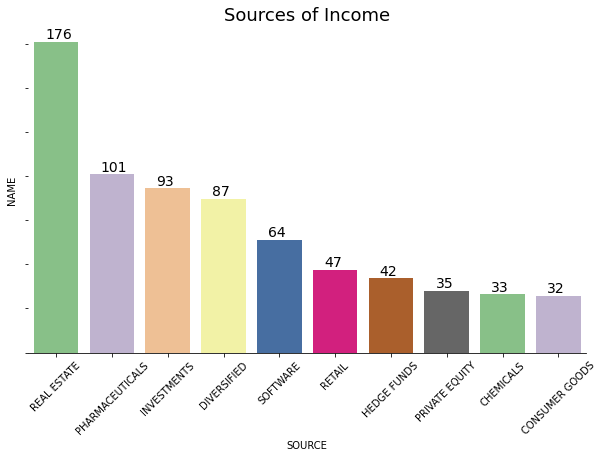

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10, 6))
sns.barplot(x='SOURCE', y='NAME', data=income, ax=ax, palette='Accent')

sns.despine(left=True)
ax.set_yticklabels([])
plt.title('Sources of Income', fontsize=18)
ax.set_xticklabels(income['SOURCE'], rotation=45)

for i in range(len(ax.get_xticklabels())):
    x = ax.get_xticklabels()[i].get_text()
    val = income['NAME'][income.SOURCE==x].tolist()[0]
    plt.text(i-0.2, val+2, str(val), fontsize=14, rotation=0)

Conclusion : Undoubtedly Real - Estate is the most common source of income with 176 billionaires, followed by Pharmaceuticals & Software holds the position 4 with 64 bilionaires. 

### 14. Find the Oldest and youngest billionaire's age?

In [ ]:
max_age = df_clean[df_clean['AGE'] == df_clean['AGE'].max()]
min_age = df_clean[df_clean['AGE'] == df_clean['AGE'].min()]
df_both = max_age.append(min_age)
df_both 
df_both.reset_index(drop=True) 

,RANK,NAME,NETWORTH,SOURCE,AGE,COUNTRY,RESIDENCE,CITIZENSHIP,STATUS,CHILDREN,UNIVERSITY_1,DEGREE_1,UNIVERSITY_2,DEGREE_2,SELF_MADE
0,1580,GEORGE JOSEPH,2.00,INSURANCE,99.00,UNITED STATES,LOS ANGELES,UNITED STATES,MARRIED,5.00,HARVARD UNIVERSITY,BACHELOR'S,None,NaN,True
1,925,KEVIN DAVID LEHMANN,3.30,DRUGSTORES,18.00,GERMANY,NaN,GERMANY,NaN,nan,NaN,NaN,NaN,NaN,False


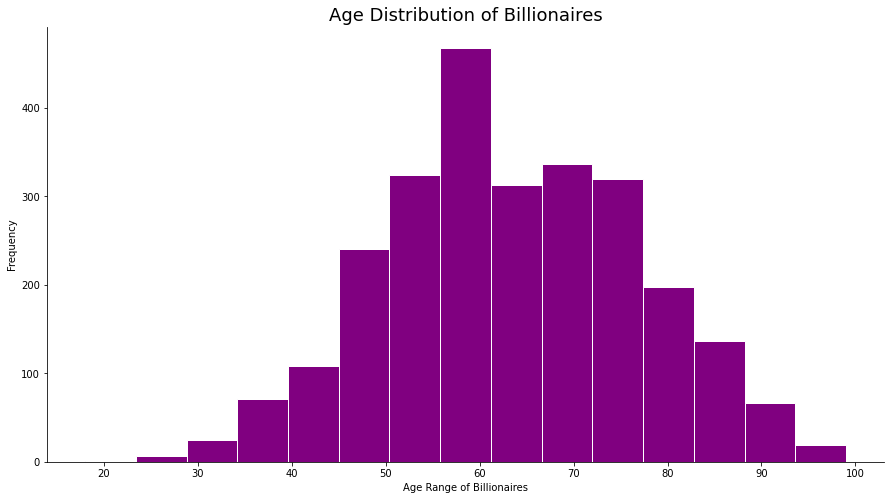

In [ ]:
#Age range of billinaires (histogram)
fig, ax = plt.subplots(figsize = (15,8))
# Plot histogram
df_clean.AGE.plot(kind = "hist", bins = 15, color = 'purple', edgecolor = 'w')
# X #
ax.set_xlabel("Age Range of Billionaires")

# Overall #
ax.set_title("Age Distribution of Billionaires", fontsize=18)
sns.despine(top=True, right=True)

plt.savefig("AgeHistogram.png", format='png')
plt.show()

Conclusion : 1) The oldest billionair is George Joseph (born September 11, 1921), that is the founder of Mercury Insurance Group of Los Angeles.2) The youngest billionair is Kevin David Lehmann, billionaire since he was 14.He is now eighteen, he has inherited from his father the "dm" grocery    chain,the largest in Europe.

### 15. How many children do billionaires have?Who has the most number of children?

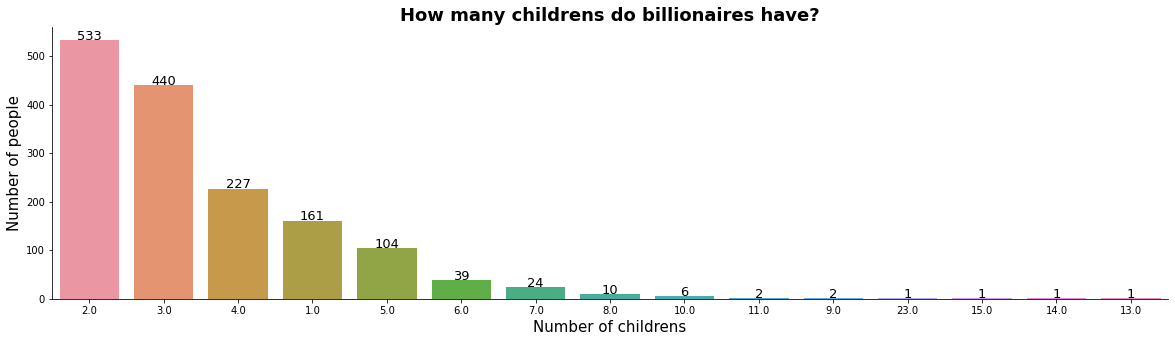

In [ ]:
plt.figure(figsize=(20,5))
mar_stat_count = df_clean['CHILDREN'].value_counts()
ax = sns.countplot(x="CHILDREN", 
                   data = df_clean,
                   order = mar_stat_count.index,
                   linewidth=2)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 13)
ax.set_title('How many childrens do billionaires have?',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Number of childrens', fontsize = 15)
ax.set_ylabel('Number of people', fontsize = 15)
sns.despine()

In [ ]:
Billion_childmax = df_clean['CHILDREN'].max() # The Billionaire who has the most children has 23
print('The Billionaire who has the most children is: ', Billion_childmax)

The Billionaire who has the most children is:  23.0


Conclusion : There are around 533 Billionaries who have 2 childrens. It certainly seems strange to hear that a man can have 23 children, in fact, Mr. Roman Avdeev adopted 19. He adopted the first two children in 2002 when he realized that his help with orphanages was ineffective.

### 16. Total Worth of Billaniories in Forbes 2021 List 

In [ ]:
round((df_clean['NETWORTH'].sum().round()/1000),2)

13.08

17. Highest Degree earned by the Billionaires 

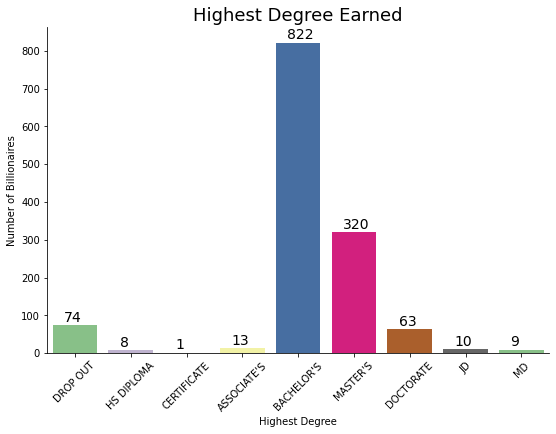

In [ ]:
#Highest Degrees of Billionaires
#Data prepping
degree = df_clean.groupby('DEGREE_1', dropna=True).size().sort_values(ascending=False)
degree_df = pd.DataFrame(degree)
order = {'DROP OUT':0, 'HS DIPLOMA':1, 'CERTIFICATE': 2, 'ASSOCIATE\'S':3, 'BACHELOR\'S':4, 'MASTER\'S': 5, 'DOCTORATE':6, 'JD':7, 'MD':8}
degree_df['rank'] = degree_df.index.map(order)
degree_df.sort_values('rank', ascending=True, inplace=True)
degree_df.drop('rank', axis=1, inplace=True)
degree_df['HIGHEST_DEGREE']= degree_df.index
degree_df.columns = ['Number of Billionaires', 'Highest Degree']
degree_df

#Create a barchart
fig, ax = plt.subplots(1,1, figsize=(9, 6))
sns.barplot(x='Highest Degree', y='Number of Billionaires', data=degree_df, ax=ax, palette='Accent')

sns.despine()
#ax.set_yticklabels([])
plt.title('Highest Degree Earned', fontsize=18)
ax.set_xticklabels(degree_df['Highest Degree'], rotation=45)

for i in range(len(ax.get_xticklabels())):
    x = ax.get_xticklabels()[i].get_text()
    val = degree_df['Number of Billionaires'][degree_df['Highest Degree']==x].tolist()[0]
    plt.text(i-0.2, val+10, str(val), fontsize=14, rotation=0)

plt.savefig("DegreeBarchart.jpeg", format='jpeg')

## Analysis for Categorical Data - Regression

Business Question: Does an advanced degree contribute to one's networth?


Assumptions:

*   If have doctorate, then also have masters, bachelors, high school graduate
*   If have masters, JD, or MD then also have bachelors, high school graduate
*   If have bachelor's or associate's, then also have high school graduate








In [ ]:
df_degree = df_clean[['NETWORTH', 'DEGREE_1']]

In [ ]:
df_degree = pd.get_dummies(df_degree, drop_first=False, prefix_sep='', prefix='')
df_degree.drop('DROP OUT', axis=1, inplace=True)

In [ ]:
#Include stated assumptions
df_degree['MASTER\'S'] = np.where(df_degree['DOCTORATE'] == 1, 1, df_degree["MASTER'S"]) 
df_degree['BACHELOR\'S'] = np.where(df_degree['MASTER\'S'] == 1, 1, df_degree["BACHELOR\'S"]) 
df_degree['BACHELOR\'S'] = np.where(df_degree['JD'] == 1, 1, df_degree["BACHELOR\'S"]) 
df_degree['BACHELOR\'S'] = np.where(df_degree['MD'] == 1, 1, df_degree["BACHELOR\'S"]) 
df_degree['HS DIPLOMA'] = np.where(df_degree['BACHELOR\'S'] == 1, 1, df_degree['HS DIPLOMA']) 
df_degree['HS DIPLOMA'] = np.where(df_degree['ASSOCIATE\'S'] == 1, 1, df_degree['HS DIPLOMA'])

In [ ]:
df_degree[df_degree['DOCTORATE']==1]

,NETWORTH,ASSOCIATE'S,BACHELOR'S,CERTIFICATE,DOCTORATE,HS DIPLOMA,JD,MASTER'S,MD
51,28.40,0,1,0,1,1,0,1,0
58,26.20,0,1,0,1,1,0,1,0
157,13.30,0,1,0,1,1,0,1,0
182,12.10,0,1,0,1,1,0,1,0
188,11.60,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...
2585,1.10,0,1,0,1,1,0,1,0
2619,1.10,0,1,0,1,1,0,1,0
2676,1.00,0,1,0,1,1,0,1,0
2679,1.00,0,1,0,1,1,0,1,0


In [ ]:
from sklearn.linear_model import LinearRegression
X = df_degree[['ASSOCIATE\'S', 'BACHELOR\'S', 'CERTIFICATE', 'DOCTORATE', 'HS DIPLOMA', 'JD', 
               'MASTER\'S', 'MD']]
y = df_degree.NETWORTH

model = LinearRegression()
model.fit(X,y)

print(model.coef_)
print(model.intercept_)

[ 5.38173077  3.25945864 -0.27839629 -1.50832341 -1.49089629 -2.44695864
  0.14866636 -1.88029197]
3.9783962889330713


Mutiple Regression Model:
Networth = 3.98 + 5.38(ASSOCIATE'S) + 3.26(BACHELOR'S) - 0.27(CERTIFICATE) - 1.51(DOCTORATE) - 1.49(HS DIPLOMA) - 2.45(JD) + 0.15(MASTER'S) - 1.88(MD)

In [ ]:
#Networth as a dropout
predict_dropout = model.predict([[0,0,0,0,0,0,0,0]])
predict_dropout

array([3.97839629])

In [ ]:
#Networth with high school diploma 
predict_HS = model.predict([[0,0,0,0,1,0,0,0]])
predict_HS

array([2.4875])

In [ ]:
#Networth with bachelor's
predict_BS = model.predict([[0,1,0,0,1,0,0,0]])
predict_BS

array([5.74695864])

In [ ]:
#Networth with masters's
predict_MS = model.predict([[0,1,0,0,1,0,1,0]])
predict_MS

array([5.895625])

In [ ]:
#Networth with doctorate
predict_PhD = model.predict([[0,1,0,1,1,0,0,0]])
predict_PhD

array([4.23863522])

Conclusion: Having more advanced degrees does contributes to networth but only to an extent. The highest degree one could achieve before negatively affecting networth is a master's - a doctorate takes away from one's networth. Additionaly, being only high school graduate or having a certificate, JD, or MD also reduces one's networth.